In [1]:
# import relevant packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel, Matern
from sklearn.metrics import mean_squared_error
from itertools import product
from gp_para import gp_tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import collections

# stop showing warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# import data sheet (time:0~5000s) with temp 120, 140, 160, 180
address = 'data/degradation.xlsx'
y_experiment = np.empty(shape=[0,1])
i = 1
temp_list = (80,100,120,140,160,180)
for temp in temp_list:
    df = pd.read_excel(address,sheet_name = 'normal data',usecols = [i],names = None,nrows = 5000)
    df = df.values.tolist()
    df = np.array(df)
    y_experiment =  np.append(y_experiment,df)
    i+=1
X_5000 = np.arange(0,5000).astype(int)

In [6]:
temp_list = (80,100,120,140,160,180)
X_5000 = np.arange(0,5000).astype(int)

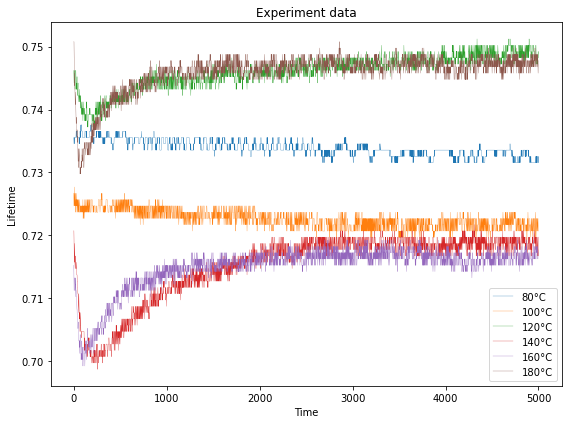

In [22]:
plt.figure(figsize=(8,6))
i = 0
for temp in temp_list:
    plt.plot(X_5000,y_experiment[i:i+5000],lw=0.3,label=('%d°C' %(temp)))
    i+=5000
plt.tick_params(axis='y')
plt.tick_params(axis='x')
plt.ylabel('Lifetime')
plt.xlabel('Time')
plt.title('Experiment data')
plt.legend()
plt.tight_layout()
plt.show()